<a href="https://colab.research.google.com/github/Han-Yujin/algorithm_coding-test/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D%EB%AA%A8%EB%8D%B81_%EB%A1%AF%EB%8D%B0%EB%A6%AC%EC%95%84_7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 35.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.6/581.6 kB 9.2 MB/s eta 0:00:00
  Created wheel for mecab-python: filename=mecab_python-1.0.0-py3-none-any.whl size=1232 sha256=ba058030b0405c509765d3e4b0c77391fea32fbd02514c83697c28efbb8cd984
  Stored in directory: /root/.cache/pip/wheels/ec/41/c8/ce8fb469be2547ce596c4000613806505dc54c296aae45da71
Successfully built mecab-python
Install mecab-ko
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  3221k      0 --:--:-- --:--:-- --:--:-- 16.9M
mecab-0.996-ko-0.9.2/
mecab-0.996-ko-0.9.2/example/
mecab-0.996-ko-0.9.2/example/ex

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import pandas as pd
data = pd.read_excel('/content/롯데리아(통합)_최종.xlsx')
#data2 = pd.read_excel('/content/맥도날드.xlsx')

In [ ]:
data['target'].isnull().sum()

15558

In [ ]:
data['target'].isnull

<bound method Series.isnull of 0          1
1        NaN
2        NaN
3          0
4          1
        ... 
22552    NaN
22553    NaN
22554    NaN
22555    NaN
22556    NaN
Name: target, Length: 22557, dtype: object>

In [ ]:
data['target']==1

0         True
1        False
2        False
3        False
4         True
         ...  
22552    False
22553    False
22554    False
22555    False
22556    False
Name: target, Length: 22557, dtype: bool

In [ ]:
data1 = data.loc[(data['target']==1) | (data['target']==0) , 'content' :'target']

In [ ]:
data1['target'] = data1['target'].astype('float32')

In [ ]:
data1

,content,target
0,너무너무너무 많이 많이 기다렸어요 워크맨 장성규님 너무너무너무 기다렸어요 롯데리...,1.0
3,햄버거 매니아로써 나오자마자 먹고싶었는데 먹으려고 할때마다 품절.. 유튜브 리뷰에서...,0.0
4,즐겨찾지요,1.0
6,포장해도 따뜻한 버거를 먹을 수 있어서 좋았습니다.,1.0
8,감자튀김에서 깨끗한 기름이 느껴져요_x000D_\n빵도 겉이 바삭바삭해서 맛있고 안...,1.0
...,...,...
15598,좋아요,1.0
15599,굿,1.0
15600,티렉스버거 굿,1.0
15601,핫크리스피 전맛탱~~,1.0


In [ ]:
len(data1)

6982

In [ ]:
print(data1['content'].nunique(), data1['target'].nunique())


5000 2


In [ ]:
print(data1.isnull().values.any())


False


In [ ]:
train_data, test_data = train_test_split(data1, test_size = 0.3, random_state = 42)
# train_data, test_data = data1, data3
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 4887
테스트용 리뷰의 개수 : 2095


<Axes: >

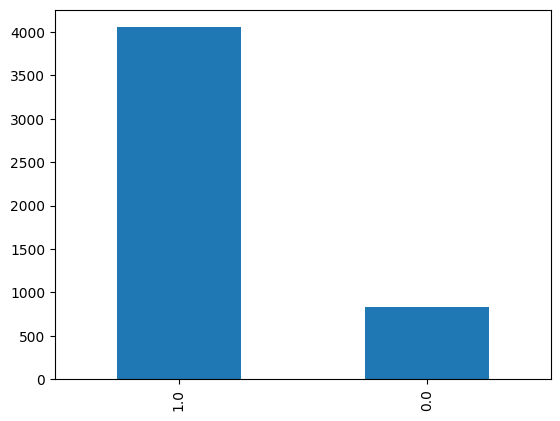

In [ ]:
train_data['target'].value_counts().plot(kind = 'bar')

In [ ]:
train_data['content'] = train_data['content'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['content'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())
train_data = train_data.dropna(how='any') # Null 값 제거
print(train_data['content'].head(20))
print('전처리 후 훈련용 샘플의 개수 :',len(train_data))

content    13
target      0
dtype: int64
11835                                       롯데리아 햄벅도 너무 비싸
4721                                                     굿
1584                                                   좋아요
13087                                          드라이브스루라 좋아요
5606                                 허쉬 핫쵸코 따뜻하고 적당한 양 좋네요
13455    롯데리아에서 귀여운 포켓몬 하우스 데려왔어요피카츄는 없네요롯데리아포켓몬하우스하우스고라파덕
9408                                                    빠름
81                                    매번 먹는 단골 롯데이아ㅎㅎㅎㅎ쪼아요
7450     미치겠다 아직도 롯데잇츠 서버폭발했나앱도 들어가지 못했다아니 롯데잇츠 롯데리아 대기...
2659            햄버거 먹으러 속초 맛집 롯데리아 롯데속초리조트 왔어요 새우버거 완전 맛있어
4437                                                     굿
810      마라가들어간 햄버거라고 새로 출시되었다고해서 함사서 먹어요먹팔해요 먹스타맞팔 먹스타...
3369                               롯데리아 비빔한마당 젅빔벅전주비빔라이스버거
7355                                                     굿
5523                                                     굿
12805                                                 좋아요 
12214         니

<ipython-input-31-3b18f734f739>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['content'] = train_data['content'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [ ]:
test_data['content'] = test_data['content'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['content'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
print(train_data.isnull().sum())
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

content    0
target     0
dtype: int64
전처리 후 테스트용 샘플의 개수 : 2089


<ipython-input-32-2de29f9ca3de>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['content'] = test_data['content'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행


In [ ]:
mecab = Mecab()
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는 게 나을 뻔'))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '뻔']


In [ ]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [ ]:
train_data['tokenized'] = train_data['content'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
test_data['tokenized'] = test_data['content'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
negative_words = np.hstack(train_data[train_data.target == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.target == 1]['tokenized'].values)

In [ ]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('롯데', 435), ('버거', 419), ('리아', 405), ('먹', 387), ('는데', 222), ('맛', 206), ('안', 200), ('어', 178), ('었', 175), ('라이스버거', 174), ('있', 173), ('없', 162), ('햄버거', 151), ('아', 145), ('거', 140), ('좋', 135), ('했', 130), ('만', 121), ('네요', 118), ('으로', 115)]


In [ ]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('롯데', 2033), ('리아', 1803), ('버거', 1362), ('좋', 1298), ('먹', 1269), ('맛있', 1040), ('아요', 850), ('어요', 771), ('굿', 746), ('햄버거', 605), ('맛', 449), ('그램', 448), ('있', 431), ('어', 393), ('아', 388), ('었', 386), ('라이스버거', 336), ('새우', 335), ('불고기', 321), ('기', 310)]


긍정 리뷰의 평균 길이 : 14.999010390895597
부정 리뷰의 평균 길이 : 25.651442307692307


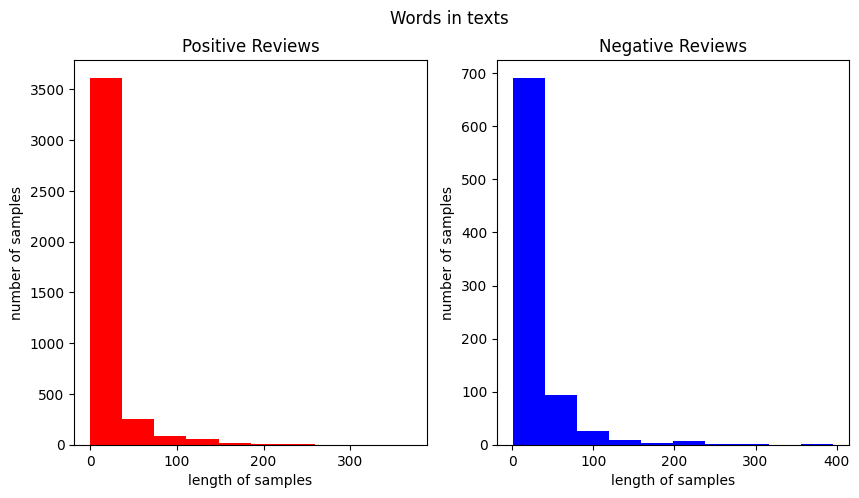

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['target']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['target']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [ ]:
X_train = train_data['tokenized'].values
y_train = train_data['target'].values
X_test= test_data['tokenized'].values
y_test = test_data['target'].values

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 7447
등장 빈도가 1번 이하인 희귀 단어의 수: 3710
단어 집합에서 희귀 단어의 비율: 49.81871894722707
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.526156548897131


In [ ]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 3739


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

[[2, 3, 479, 857, 38, 496], [11], [6, 8]]


In [ ]:
print(X_test[:3])

[[11], [204, 158, 287, 292, 4, 380, 43, 52, 2, 3, 618, 273, 74], [62, 2, 3, 2, 177, 975, 35, 456, 114, 766, 2453, 938, 1, 1099, 1, 180, 1, 373, 10, 2373, 13, 2394, 2394, 1, 69, 127, 1, 77, 224, 137, 149, 662, 2304, 1, 1361, 203, 37, 5, 25, 474, 641, 75, 157, 893, 1, 2873, 1125, 1, 20, 5, 25, 276, 3562, 1, 875, 1, 1, 516, 1, 69, 1, 1, 1344, 54, 1, 1, 3431, 372, 1298, 179, 76, 1411, 374, 304, 2539, 1, 1411, 1, 2469, 2304, 1, 1361, 236, 42, 17, 73, 65, 17, 73, 65, 10, 23, 4, 22, 4, 24, 4, 1, 1361, 77, 1125, 1, 132, 241, 97, 241, 42, 17, 1, 1927, 764, 79, 865, 82, 298, 573, 82, 298, 573, 605]]


리뷰의 최대 길이 : 396
리뷰의 평균 길이 : 16.817398440705787


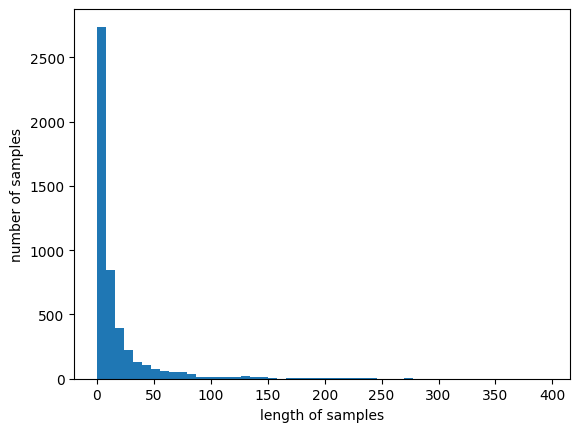

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 390
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 390 이하인 샘플의 비율: 99.97948297086582


In [ ]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
data1['target'] = data1['target'].astype('float32')

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
61/61 [==============================] - ETA: 0s - loss: 0.3984 - acc: 0.8248
Epoch 1: val_acc improved from -inf to 0.86051, saving model to best_model.h5
61/61 [==============================] - 63s 973ms/step - loss: 0.3984 - acc: 0.8248 - val_loss: 0.3058 - val_acc: 0.8605
Epoch 2/15
61/61 [==============================] - ETA: 0s - loss: 0.2687 - acc: 0.8828
Epoch 2: val_acc improved from 0.86051 to 0.88615, saving model to best_model.h5
61/61 [==============================] - 59s 976ms/step - loss: 0.2687 - acc: 0.8828 - val_loss: 0.2605 - val_acc: 0.8862
Epoch 3/15
61/61 [==============================] - ETA: 0s - loss: 0.2034 - acc: 0.9177
Epoch 3: val_acc improved from 0.88615 to 0.89846, saving model to best_model.h5
61/61 [==============================] - 57s 933ms/step - loss: 0.2034 - acc: 0.9177 - val_loss: 0.2549 - val_acc: 0.8985
Epoch 4/15
61/61 [==============================] - ETA: 0s - loss: 0.1681 - acc: 0.9364
Epoch 4: val_acc did not improve from 

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

66/66 [==============================] - 8s 117ms/step - loss: 0.3103 - acc: 0.8827

 테스트 정확도: 0.8827


In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = mecab.morphs(new_sentence)
  new_sentence = [word for word in new_sentence if not word in stopwords]
  encoded = tokenizer.texts_to_sequences([new_sentence])
  pad_new = pad_sequences(encoded, maxlen = max_len)

  score = float(loaded_model.predict(pad_new))
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [ ]:
sentiment_predict('친절합니다.~~맛은기본으로 맛나요~~')

1/1 [==============================] - 1s 525ms/step
99.81% 확률로 긍정 리뷰입니다.


In [ ]:
sentiment_predict('감자튀김이 덜 익은것처럼 하얗네요. 막튀긴게 축축하고.')

sentiment_predict('난 또 맛없는 햄버거 프랜차이즈로서의 아이덴티티를 지킬려는줄위의 재고 관리니 트러블이니 이런것도 있겠지만그거다 핑계야')
sentiment_predict('협력업체랑 잘 좀 지내. 갑질 좀 그만하고. 누가 롯데 아니랄까봐')
sentiment_predict('협력업체랑 잘 좀 지내.')
sentiment_predict('갑질 좀 그만하고.')
sentiment_predict('협력업체랑 잘 좀 지내. 갑질 좀 그만하고.')
sentiment_predict('협력업체랑 잘 좀 지내. 누가 롯데 아니랄까봐')
sentiment_predict('전주비빔라이스버거는 좀 부셔져서 먹기가힘드네요 맛은 나쁘지않아요. 불고기버거도 소소')
sentiment_predict('롯데리아보다 맥도날드가 낫다')
sentiment_predict('롯데리아보다 맥도날드가 낫지')
sentiment_predict('맥도날드보다 롯데리아가 낫다')
sentiment_predict('맥도날드보다 롯데리아가 낫지')
sentiment_predict('맥도날드 롯데리아')
sentiment_predict('맥도날드보다 롯데리아')
sentiment_predict('롯데리아 맥도날드')
sentiment_predict('롯데리아보다 맥도날드')
sentiment_predict('킹도날드')
sentiment_predict('킹도날도')
sentiment_predict('킹도날ㄷ')

1/1 [==============================] - 0s 54ms/step
59.77% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 51ms/step
90.62% 확률로 부정 리뷰입니다.
1/1 [==============================] - 0s 54ms/step
98.40% 확률로 부정 리뷰입니다.
1/1 [==============================] - 0s 49ms/step
82.30% 확률로 부정 리뷰입니다.
1/1 [==============================] - 0s 54ms/step
97.11% 확률로 부정 리뷰입니다.
1/1 [==============================] - 0s 53ms/step
99.46% 확률로 부정 리뷰입니다.
1/1 [==============================] - 0s 49ms/step
83.33% 확률로 부정 리뷰입니다.
1/1 [==============================] - 0s 51ms/step
53.05% 확률로 부정 리뷰입니다.
1/1 [==============================] - 0s 52ms/step
61.61% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 50ms/step
61.61% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 45ms/step
83.96% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 76ms/step
83.96% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 50ms/step
69.51% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 51ms/step